In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline    
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-darkgrid') 
from pylab import rcParams  
import plotly.graph_objs as go
import cufflinks
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler

C:\Users\chris\anaconda4\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\chris\anaconda4\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\chris\anaconda4\lib\site-packages\numpy\.libs\libopenblas.xwydx2ikjw2nmtwsfyngfuwkqu3lytcz.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Cpi Greece - Monthly
df_cpi = pd.read_csv('Datasets/GREEK CPI - monthly data.csv')
df_cpi['Date'] =  pd.to_datetime(df_cpi['Date'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df_cpi['Overall index'] = pd.to_numeric(df_cpi['Overall index'])
df_cpi.head()

,Date,Overall index,Rate of change % from month to month,Annual rate of change %,Readjustment of rents(75%),Rate of change % with the index of the previous December,Annual average index,Annual average rate of change %
0,2001-01-01,72.38,-1.6,3.4,2.6,-1.6,71.91,3.2
1,2001-02-01,72.31,-0.1,3.5,2.6,-1.7,72.12,3.3
2,2001-03-01,73.73,2.0,3.0,2.3,0.2,72.30,3.3
3,2001-04-01,74.42,0.9,3.5,2.6,1.2,72.51,3.3
4,2001-05-01,74.74,0.4,3.6,2.7,1.6,72.73,3.4


In [3]:
# Commodity Food Price Index - Monthly
df_food_price_index= pd.read_csv('Datasets/Commodity Food Price Index Monthly Price.csv')
df_food_price_index['Date'] =  pd.to_datetime(df_food_price_index['Month'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df_food_price_index.drop(['Month'], inplace=True, axis=1)
df_food_price_index = df_food_price_index[df_food_price_index['Date']>= '2001-01-01']
df_food_price_index.reset_index(inplace=True, drop=True)
df_food_price_index.head()

,Price,Change,Date
0,48.59,0.03%,2001-01-01
1,48.10,-1.02%,2001-02-01
2,47.75,-0.72%,2001-03-01
3,47.16,-1.23%,2001-04-01
4,47.82,1.39%,2001-05-01


In [4]:
# Commodity Energy Price Index - Monthly
df_energy_price_index = pd.read_csv('Datasets/Commodity Fuel (energy) Index Monthly Price.csv')
df_energy_price_index['Date'] =  pd.to_datetime(df_energy_price_index['Month'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df_energy_price_index.drop(['Month'], inplace=True, axis=1)
df_energy_price_index = df_energy_price_index[df_energy_price_index['Date']>= '2001-01-01']
df_energy_price_index.reset_index(inplace=True, drop=True)
df_energy_price_index.head()

,Price,Change,Date
0,42.71,-0.13%,2001-01-01
1,40.72,-4.65%,2001-02-01
2,37.75,-7.29%,2001-03-01
3,38.50,1.97%,2001-04-01
4,39.14,1.68%,2001-05-01


In [5]:
# GDP - Quarterly
df_gdp = pd.read_csv('Datasets/GDP - Quarterly data for Greece.csv')
df_gdp = df_gdp[df_gdp['unit'] == 'CP_MEUR'] # Current prices, million euro
df_gdp = df_gdp[df_gdp['s_adj'] == 'SCA']
df_gdp.reset_index(inplace=True)
df_gdp.drop(['index', 'DATAFLOW', 'LAST UPDATE', 'freq', 's_adj', 'unit', 'geo', 'OBS_FLAG', 'na_item'], inplace=True, axis=1)
df_gdp.rename(columns = {'TIME_PERIOD':'Date'}, inplace = True)
df_gdp.rename(columns = {'OBS_VALUE':'Gdp'}, inplace = True)
df_gdp['Date'].replace(regex=True,inplace=True, to_replace='M',value='')
df_gdp['Date'] =  pd.to_datetime(df_gdp['Date'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df_gdp = df_gdp[df_gdp['Date']>= '2001-01-01']
df_gdp.reset_index(inplace=True, drop=True)


# GDP - Convert to Monthly Data
df_gdp_monthly = df_gdp
df_gdp_monthly['Date'] = pd.to_datetime(df_gdp_monthly['Date']).dt.to_period('M')

# set Date as index and resample
df_gdp_monthly = df_gdp_monthly.set_index('Date').resample('M').interpolate()

#setting new index in order to create the overall monthly dataset
index = pd.Index(range(0, df_gdp_monthly.shape[0], 1))
df_gdp_monthly = df_gdp_monthly.set_index(index)
df_gdp_monthly.tail()

,Gdp
251,49726.733333
252,50579.300000
253,51226.900000
254,51874.500000
255,52522.100000


In [6]:
# HICP - Monthly
df_hicp = pd.read_csv('Datasets/HICP - monthly data.csv')
df_hicp = df_hicp[df_hicp['geo'] == 'EL']
df_hicp = df_hicp[df_hicp['coicop'] == 'CP00']
df_hicp = df_hicp[df_hicp['unit'] == 'I15']
df_hicp.reset_index(inplace=True)
df_hicp.drop(['index', 'DATAFLOW', 'LAST UPDATE', 'freq', 'coicop', 'unit', 'geo', 'OBS_FLAG'], inplace=True, axis=1)
df_hicp.rename(columns = {'TIME_PERIOD':'Date'}, inplace = True)
df_hicp['Date'].replace(regex=True,inplace=True, to_replace='M',value='')
df_hicp['Date'] =  pd.to_datetime(df_hicp['Date'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df_hicp.rename(columns = {'OBS_VALUE':'Hicp'}, inplace = True)
df_hicp = df_hicp[df_hicp['Date']>= '2001-01-01']
df_hicp.reset_index(inplace=True, drop=True)
df_hicp.head()

,Date,Hicp
0,2001-01-01,71.61
1,2001-02-01,71.46
2,2001-03-01,73.13
3,2001-04-01,73.94
4,2001-05-01,74.31


In [7]:
# Unemployment rate - Monthly
def unemployment_rate(country, sex, age_range, adjusted_bool, unit_measure):

    df= pd.read_csv('Datasets/UNEMPLOYMENT RATES FOR EUROPE.csv')
    df = df[df['geo'] == country] # ορίζουμε την χ΄ώρα, περνάμε ως όρισμα το EL για την Ελλάδα
    df = df[df['sex'] == sex] # ορίζουμε το φύλο,  T και για τα δύο, M για άνδρες, F για γυναίκες
    df = df[df['age'] == age_range] # ορίζουμε το ηλιακιακό εύρος. 'TOTAL' για όλους, 'Y_LT25' για κάτω των 25, 
                                    # 'Υ25-74' για άτομα από 25 έως 74
    df = df[df['s_adj'] == adjusted_bool] # κατηγοροποιούμε τα δεδομένα ως Unadjusted ('NSA') 
                                          # ή ως Seasonally adjusted ('SA') ή ως Trend cycle data ('TC')
    df = df[df['unit'] == unit_measure] # θέτουμε 'PC_ACT' για προβολή των ανέργων ως ποσοστό του ολικού πληθυσμού,
                                        # ή θέτουμε 'THS_PER' για προβολή των ανέργων ως χιλιάδες άτομα
    df.reset_index(inplace=True)
    df.drop(['index','s_adj', 'DATAFLOW', 'LAST UPDATE', 'freq', 's_adj', 'unit', 'geo', 'OBS_FLAG', 'age', 'sex'], inplace=True, axis=1)
    df.rename(columns = {'TIME_PERIOD':'Date'}, inplace = True)
    df['Date'].replace(regex=True,inplace=True, to_replace='M',value='')
    df['Date'] =  pd.to_datetime(df['Date'], format='%Y%m', errors='ignore', infer_datetime_format=True)
    df.rename(columns = {'OBS_VALUE':'Unemployment Rate'}, inplace = True)
    df = df[df['Date']>= '2001-01-01']
    df.reset_index(inplace=True, drop=True)
    return df

df_unemployment_rate = unemployment_rate('EL', 'T', 'TOTAL', 'SA', 'THS_PER')
df_unemployment_rate.head()

,Date,Unemployment Rate
0,2001-01-01,480.0
1,2001-02-01,481.0
2,2001-03-01,481.0
3,2001-04-01,489.0
4,2001-05-01,488.0


In [8]:
# Real Estate - Rent Price
df_real_estate = pd.read_csv('Datasets/real estate.csv')
df_real_estate = df_real_estate[df_real_estate['LOCATION'] == 'GRC']
df_real_estate = df_real_estate[df_real_estate['SUBJECT'] == 'RENT'] # CHOOSING RENT PRICES
df_real_estate = df_real_estate[df_real_estate['FREQUENCY'] == 'Q'] # Quarterly Frequency
df_real_estate.reset_index(inplace=True)
df_real_estate.drop(['index','LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'], inplace=True, axis=1)
df_real_estate.rename(columns = {'TIME':'Date'}, inplace = True)
df_real_estate['Date'].replace(regex=True,inplace=True, to_replace='M',value='')
df_real_estate['Date'] =  pd.to_datetime(df_real_estate['Date'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df_real_estate = df_real_estate[df_real_estate['Date']>= '2001-01-01']
df_real_estate.sort_values(by='Date', inplace = True)
df_real_estate.reset_index(inplace=True, drop=True)

# Real Estate Index - Convert to Monthly Data
df_real_estate_monthly_rent_price = df_real_estate
df_real_estate_monthly_rent_price['Date'] = pd.to_datetime(df_real_estate_monthly_rent_price['Date']).dt.to_period('M')

# set Date as index and resample
df_real_estate_monthly_rent_price = df_real_estate_monthly_rent_price.set_index('Date').resample('M').interpolate()


#setting new index in order to create the overall monthly dataset
index = pd.Index(range(0, df_real_estate_monthly_rent_price.shape[0], 1))
df_real_estate_monthly_rent_price = df_real_estate_monthly_rent_price.set_index(index)
df_real_estate_monthly_rent_price.tail()

,Value
257,93.103189
258,93.150286
259,93.374955
260,93.599624
261,93.824293


In [9]:
# Real Estate - Real House Prices
df_real_estate = pd.read_csv('Datasets/real estate.csv')
df_real_estate = df_real_estate[df_real_estate['LOCATION'] == 'GRC']
df_real_estate = df_real_estate[df_real_estate['SUBJECT'] == 'REAL'] # CHOOSING REAL HOUSE PRICES
df_real_estate = df_real_estate[df_real_estate['FREQUENCY'] == 'Q'] # Quarterly Frequency
df_real_estate.reset_index(inplace=True)
df_real_estate.drop(['index','LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'], inplace=True, axis=1)
df_real_estate.rename(columns = {'TIME':'Date'}, inplace = True)
df_real_estate['Date'].replace(regex=True,inplace=True, to_replace='M',value='')
df_real_estate['Date'] =  pd.to_datetime(df_real_estate['Date'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df_real_estate = df_real_estate[df_real_estate['Date']>= '2001-01-01']
df_real_estate.sort_values(by='Date', inplace = True)
df_real_estate.reset_index(inplace=True, drop=True)
df_real_estate.head()

# Real Estate Index - Convert to Monthly Data
df_real_estate_monthly_real_price = df_real_estate
df_real_estate_monthly_real_price['Date'] = pd.to_datetime(df_real_estate_monthly_real_price['Date']).dt.to_period('M')

# set Date as index and resample
df_real_estate_monthly_real_price = df_real_estate_monthly_real_price.set_index('Date').resample('M').interpolate()


#setting new index in order to create the overall monthly dataset
index = pd.Index(range(0, df_real_estate_monthly_real_price.shape[0], 1))
df_real_estate_monthly_real_price = df_real_estate_monthly_real_price.set_index(index)
df_real_estate_monthly_real_price.tail()

,Value
251,119.323186
252,119.147976
253,119.960814
254,120.773653
255,121.586491


In [10]:
# LCI

df_lci= pd.read_csv('Datasets/Labour cost index.csv')
df_lci = df_lci[df_lci['geo'] == 'EL']
df_lci = df_lci[df_lci['lcstruct'] == 'D11']
df_lci = df_lci[df_lci['s_adj'] == 'CA']
df_lci = df_lci[df_lci['unit'] == 'I16']
df_lci = df_lci[df_lci['nace_r2'] == 'D'] # nace_r2 is specifing the economic activity equal to D Electricity, gas, steam and air conditioning supply 
df_lci.reset_index(inplace=True)
df_lci.drop(['index','s_adj', 'DATAFLOW', 'LAST UPDATE', 'freq', 'lcstruct', 'unit', 'geo', 'OBS_FLAG', 'nace_r2'], inplace=True, axis=1)
df_lci.rename(columns = {'TIME_PERIOD':'Date'}, inplace = True)
df_lci['Date'].replace(regex=True,inplace=True, to_replace='M',value='')
df_lci['Date'] =  pd.to_datetime(df_lci['Date'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df_lci.rename(columns = {'OBS_VALUE':'Lci'}, inplace = True)
df_lci.tail()

# LCI - Convert to Monthly Data
df_lci_monthly = df_lci
df_lci_monthly['Date'] = pd.to_datetime(df_lci_monthly['Date']).dt.to_period('M')

# set Date as index and resample
df_lci_monthly = df_lci_monthly.set_index('Date').resample('M').interpolate()

#setting new index in order to create the overall monthly dataset
index = pd.Index(range(0, df_lci_monthly.shape[0], 1))
df_lci_monthly = df_lci_monthly.set_index(index)
df_lci_monthly.tail()

,Lci
263,103.466667
264,100.400000
265,103.333333
266,106.266667
267,109.200000


In [11]:
#Monthly Dataframe
df_monthly = pd.DataFrame()
df_monthly['Date'] = df_cpi['Date'] 
df_monthly['Cpi'] = df_cpi['Overall index']
df_monthly['Food Price Index'] = df_food_price_index['Price']
df_monthly['Energy Price Index'] = df_energy_price_index['Price']
df_monthly['Hicp'] = df_hicp['Hicp']
df_monthly['Unemployment Rate'] = df_unemployment_rate['Unemployment Rate']
df_monthly['Gdp'] = df_gdp_monthly['Gdp']
df_monthly['Rent Price'] = df_real_estate_monthly_rent_price['Value']
df_monthly['House Prices'] = df_real_estate_monthly_real_price['Value']
df_monthly['Lci'] = df_lci_monthly['Lci']
df_monthly

,Date,Cpi,Food Price Index,Energy Price Index,Hicp,Unemployment Rate,Gdp,Rent Price,House Prices,Lci
0,2001-01-01,72.38,48.59,42.71,71.61,480.0,37255.200000,83.116416,120.046616,47.300000
1,2001-02-01,72.31,48.10,40.72,71.46,481.0,37380.333333,83.367495,120.995312,50.100000
2,2001-03-01,73.73,47.75,37.75,73.13,481.0,37505.466667,83.618574,121.944007,52.900000
3,2001-04-01,74.42,47.16,38.50,73.94,489.0,37630.600000,83.869654,122.892703,55.700000
4,2001-05-01,74.74,47.82,39.14,74.31,488.0,37939.833333,84.182929,122.751253,56.200000
...,...,...,...,...,...,...,...,...,...,...
255,2022-04-01,111.08,158.87,153.19,110.55,589.0,52522.100000,93.008995,121.586491,104.900000
256,2022-05-01,111.80,159.04,160.58,111.59,591.0,NaN,93.056092,NaN,107.900000
257,2022-06-01,113.62,151.50,170.72,114.05,579.0,NaN,93.103189,NaN,110.900000
258,2022-07-01,111.54,138.63,168.76,112.19,530.0,NaN,93.150286,NaN,113.900000


In [12]:
# Deleting rows with nan values
df_monthly = df_monthly.dropna()

In [13]:
# Setting date as index
df_monthly = df_monthly.set_index('Date')

In [14]:
df_monthly

,Cpi,Food Price Index,Energy Price Index,Hicp,Unemployment Rate,Gdp,Rent Price,House Prices,Lci
Date,,,,,,,,,
2001-01-01,72.38,48.59,42.71,71.61,480.0,37255.200000,83.116416,120.046616,47.300000
2001-02-01,72.31,48.10,40.72,71.46,481.0,37380.333333,83.367495,120.995312,50.100000
2001-03-01,73.73,47.75,37.75,73.13,481.0,37505.466667,83.618574,121.944007,52.900000
2001-04-01,74.42,47.16,38.50,73.94,489.0,37630.600000,83.869654,122.892703,55.700000
2001-05-01,74.74,47.82,39.14,74.31,488.0,37939.833333,84.182929,122.751253,56.200000
...,...,...,...,...,...,...,...,...,...
2021-12-01,104.95,127.31,112.37,104.87,605.0,49726.733333,92.680738,119.323186,99.433333
2022-01-01,104.68,133.82,121.31,104.65,630.0,50579.300000,92.792445,119.147976,97.000000
2022-02-01,105.84,141.36,131.27,105.63,622.0,51226.900000,92.864628,119.960814,99.633333


In [15]:
scaler = MinMaxScaler()
scaled_monthly_data = scaler.fit_transform(df_monthly)

scaled_monthly_data = pd.DataFrame(scaled_monthly_data, columns = df_monthly.columns)
scaled_monthly_data.index = df_monthly.index
scaled_monthly_data

,Cpi,Food Price Index,Energy Price Index,Hicp,Unemployment Rate,Gdp,Rent Price,House Prices,Lci
Date,,,,,,,,,
2001-01-01,0.001806,0.016060,0.111474,0.003837,0.109312,0.000000,0.000000,0.315560,0.000000
2001-02-01,0.000000,0.011688,0.097947,0.000000,0.110324,0.005330,0.006099,0.328415,0.017084
2001-03-01,0.036626,0.008565,0.077760,0.042722,0.110324,0.010660,0.012198,0.341270,0.034167
2001-04-01,0.054424,0.003301,0.082858,0.063443,0.118421,0.015991,0.018297,0.354126,0.051251
2001-05-01,0.062677,0.009190,0.087208,0.072909,0.117409,0.029163,0.025907,0.352209,0.054301
...,...,...,...,...,...,...,...,...,...
2021-12-01,0.841888,0.718415,0.584965,0.854694,0.235830,0.531242,0.232332,0.305757,0.318080
2022-01-01,0.834924,0.776499,0.645731,0.849066,0.261134,0.567558,0.235046,0.303382,0.303234
2022-02-01,0.864844,0.843772,0.713431,0.874137,0.253036,0.595143,0.236799,0.314397,0.319300


In [16]:
scaled_monthly_data.corr()

,Cpi,Food Price Index,Energy Price Index,Hicp,Unemployment Rate,Gdp,Rent Price,House Prices,Lci
Cpi,1.000000,0.853928,0.633009,0.997967,0.700756,0.075224,0.356848,-0.496356,0.381878
Food Price Index,0.853928,1.000000,0.829235,0.836909,0.487730,0.245344,0.502633,-0.230265,0.487068
Energy Price Index,0.633009,0.829235,1.000000,0.600793,0.300729,0.468453,0.668466,0.084929,0.545833
Hicp,0.997967,0.836909,0.600793,1.000000,0.689741,0.060889,0.322703,-0.511392,0.367598
Unemployment Rate,0.700756,0.487730,0.300729,0.689741,1.000000,-0.462549,0.070047,-0.810885,-0.065747
Gdp,0.075224,0.245344,0.468453,0.060889,-0.462549,1.000000,0.723925,0.770588,0.776458
Rent Price,0.356848,0.502633,0.668466,0.322703,0.070047,0.723925,1.000000,0.465695,0.865967
House Prices,-0.496356,-0.230265,0.084929,-0.511392,-0.810885,0.770588,0.465695,1.000000,0.455172
Lci,0.381878,0.487068,0.545833,0.367598,-0.065747,0.776458,0.865967,0.455172,1.000000


<AxesSubplot:>

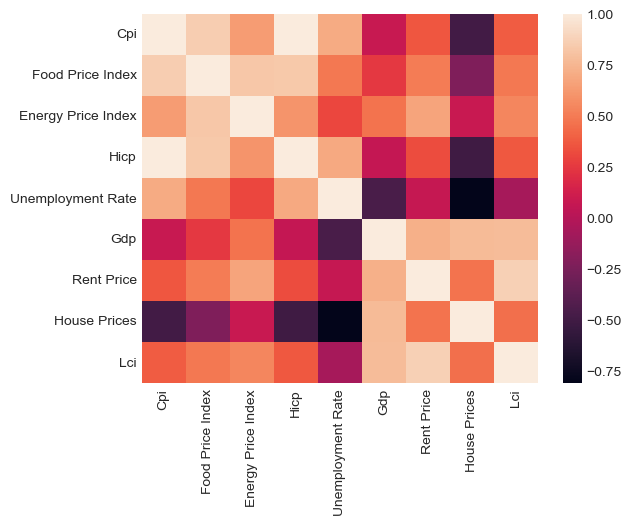

In [17]:
sns.heatmap(scaled_monthly_data.corr())

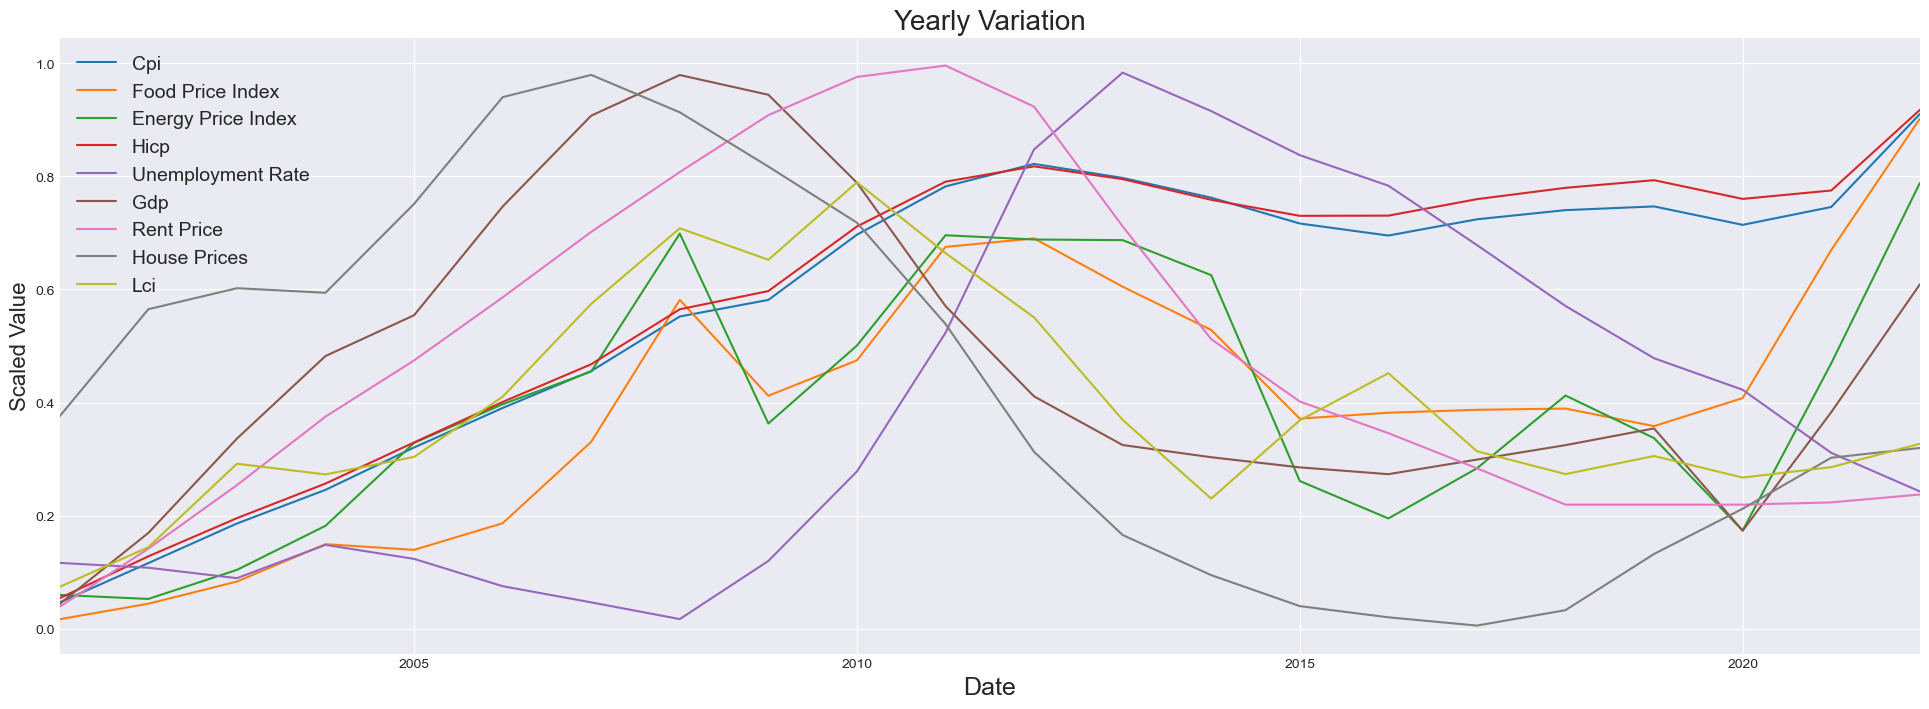

In [18]:
scaled_monthly_data.resample('1y').mean().plot(figsize=(24,8), title="Yearly Variation")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Scaled Value', fontsize=16)
plt.title('Yearly Variation', fontsize=20)
plt.legend(fontsize=14)

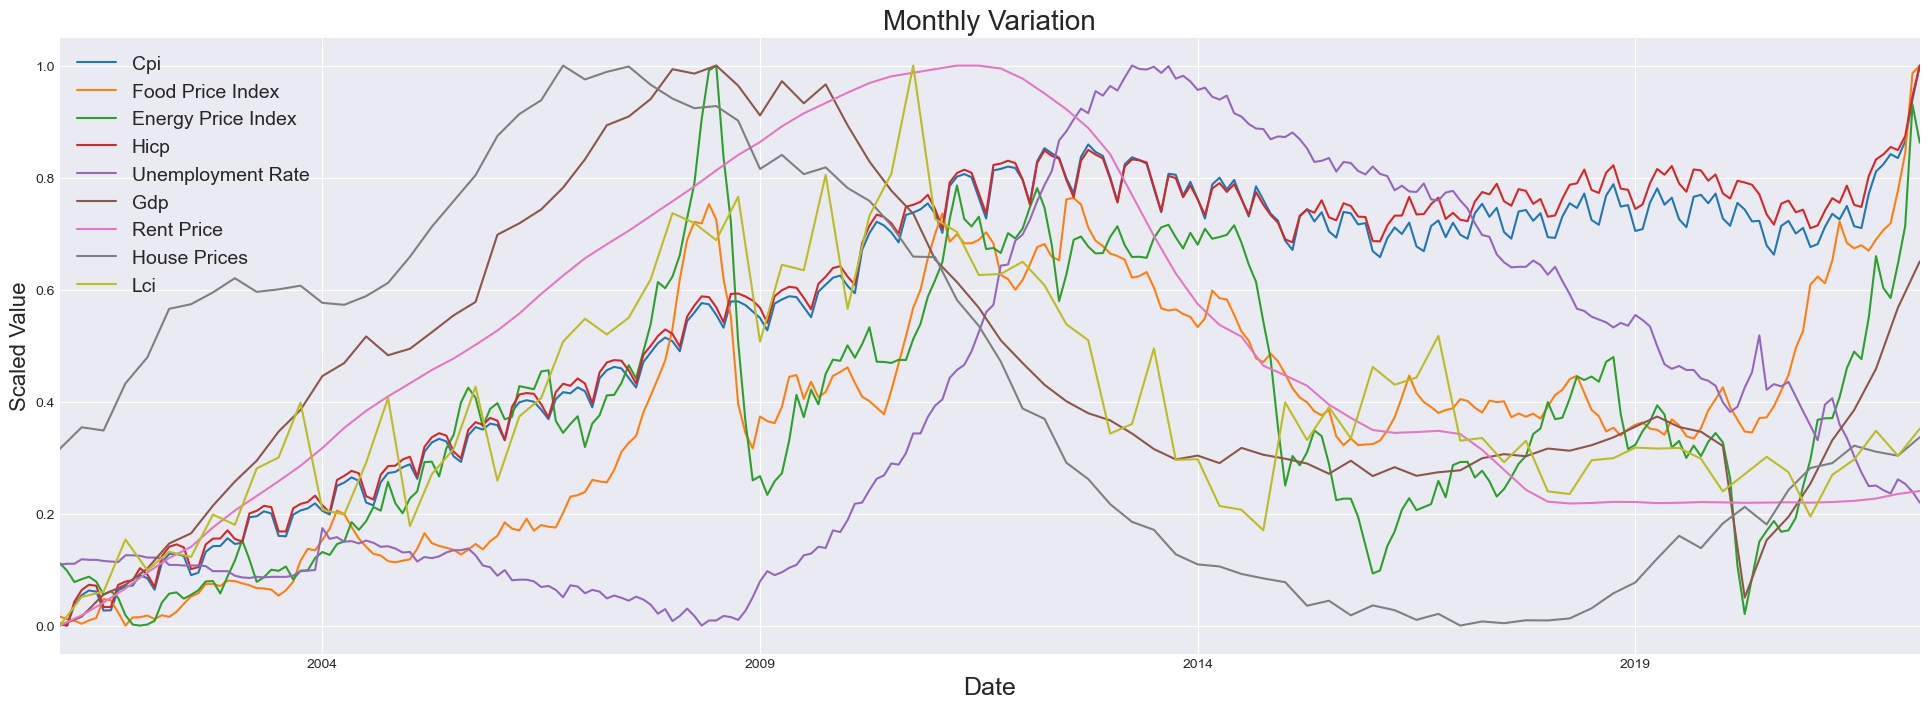

In [19]:
scaled_monthly_data.resample('1m').mean().plot(figsize=(24,8))
plt.xlabel('Date', fontsize=18)
plt.ylabel('Scaled Value', fontsize=16)
plt.title('Monthly Variation', fontsize=20)
plt.legend(fontsize=14)

In [20]:
train_size = int(len(df_monthly) * 0.77)
X_train, X_test = df_monthly[0:train_size], df_monthly[train_size:]
print("Train Data time period: " + str(X_train.index[0]) + " till " +str(X_train.index[-1]) +"\n")
print("Test Data time period: " + str(X_test.index[0]) + " till " +str(X_test.index[-1]) +"\n")

Train Data time period: 2001-01-01 00:00:00 till 2017-05-01 00:00:00

Test Data time period: 2017-06-01 00:00:00 till 2022-04-01 00:00:00



In [21]:
scaled_monthly_data.to_csv('Inflation and Parameters.csv')